In [12]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from matplotlib import animation, rc
from IPython.display import HTML, Image
mpl.rcParams['figure.dpi']= 100

# Problem 1: Shock formation

Consider the equation $u_t+(u^2)_x=0$, which is equivalent to $u_t+2uu_x=0$, with $u(x,0)=u_0(x)$. The characteristic equations are $$\frac{dx}{dt}=2u, \quad\frac{du}{dt}=0.$$ Integrating these shows that the characteristics are streight lines with constant $u$, i.e. 
$$x=2ut+x_0\quad\text{and}\quad u=c.$$
We can identify $u=c=u_0(x_0)$. The trajectory of the characteristic is therefore $x=2u_0(x_0)t+x_0$. The solution is hence given by $$u(x,t)=u_0(x_0)=u_0(x-2ut).$$

As time approaches breaking time $T_b$, the solution becomes vertical at $x_0=x_b$. This means $$\frac{\partial u}{\partial x}(x_b,t)\rightarrow \infty\quad \text{as}\quad t\rightarrow T_b.$$
With our solution, we can find $$\frac{\partial u}{\partial x}=\frac{\partial}{\partial x}u_0(x-2ut)=u_0'(x_0)\left(1-2t\frac{\partial u}{\partial x}\right).$$ Rearanging this equation, we obtain
$$\frac{\partial u}{\partial x}=\frac{u_0'(x_0)}{1+2tu_0'(x_0)}$$
$u_0'>0$: classical solution, exists for all times $t$.

$u_0'<0$: Solution forms discontinouities or shocks, when $u_x \rightarrow \infty$. This is the case if the denominator of $u_x$ tends to zero
$$\Rightarrow t\rightarrow \frac{-1}{u_0'(x_0)}$$
Is $u_0'(x)<0$ the earlist breaking time will therefore be
$$ T_b = \frac{-1}{\min u_0'(x)}$$
This can easily be generalized for any convex function $f(u)$ in 
$$u_t+f(u)_x=0$$
since the characteristic depend on $f(u)$ and thus the time where the shock will build up can be determined by our equation if $f(u)$ is convex in $u$, i.e. $f''(u)>0$.

# Problem 2: Advection Equation with variable coefficient

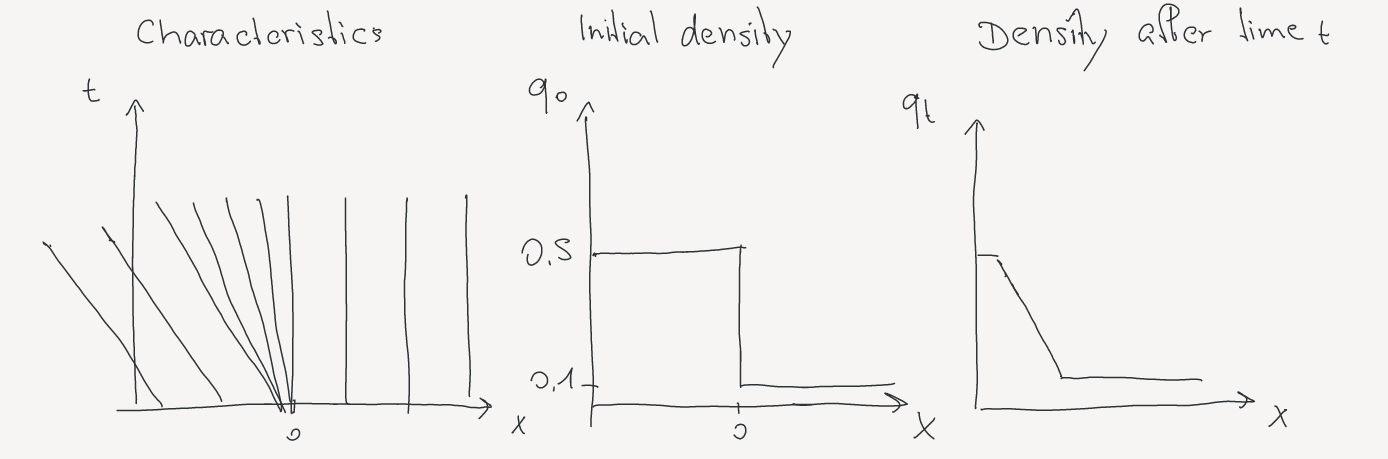

In [25]:
Image("char.png")

# Problem 3: Viscous Burger's Equation

## a) 

FTCS discretization of the viscous Burger's equation:

$$\begin{align} 
\frac{u_i^{n+1}-u_i^n}{\Delta t}+u_i^n\frac{u_{i+1}^n-u_{i-1}^n}{2\Delta x}=D\frac{u_{i+1}^n-2u_i^n+u_{i-1}^n}{\Delta x^2}\end{align}$$

This leads to the step-rule

$$\Rightarrow \begin{align} u_i^{n+1}=u_i^n+D\frac{\Delta t}{\Delta x^2}(u_{i+1}^n-2u_i^n+u_{i-1}^n)-u_i^n\frac{\Delta t}{2\Delta x}(u_{i+1}^n-u_{i-1}^n)\end{align}$$

## b)

In [13]:
def gaussian(x, m, s):
    return np.exp(-(x-m)**2/(2*s**2))

In [14]:
def burgers(u_0, time_steps, D):
    # Get length of initial value array
    position_steps = u_0.shape[0]
    
    # Allocate matrix for the solution
    u = np.zeros((position_steps, time_steps))

    # Hard coded step size
    dt = 0.1
    dx = 1
    
    # Write initial value in solution matrix
    u[:,0] = u_0
    
    # Iterate through time steps
    for n in range(1,time_steps):
            for i in range(1, position_steps-1):
                diffusion = D*dt/dx**2 * (u[i+1][n-1]-2*u[i][n-1]+u[i-1][n-1])
                advection = u[i][n-1]*dt/(2*dx)*(u[i+1][n-1]-u[i-1][n-1])
                u[i][n] =   diffusion - advection + u[i][n-1]
                
            # Periodic boundary condtions
            # First
            diffusion = D*dt/dx**2 * (u[1][n-1]-2*u[0][n-1]+u[-2][n-1])
            advection = u[0][n-1]*dt/(2*dx)*(u[1][n-1]-u[-2][n-1])
            u[0][n] =   diffusion - advection +u[0][n-1]
            # Last
            u[-1][n] = u[0][n]          
    return u  

In [15]:
position_steps = 1000
time_steps = 3000
diffusion = 1

# Make gaussian initial conditions
u_0 = np.array([gaussian(x, 0, 1) for x in np.linspace(-5,5,position_steps)])

# Perform time steps
sol = burgers(u_0, time_steps, diffusion)

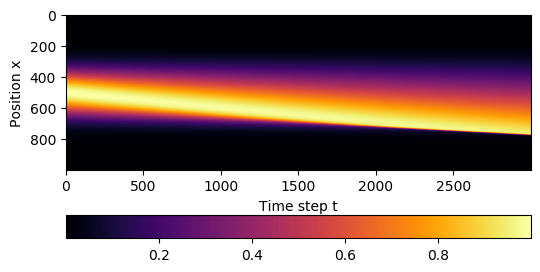

In [16]:
plt.imshow(sol, cmap="inferno")
plt.xlabel("Time step t")
plt.ylabel("Position x")
plt.colorbar(orientation="horizontal")

Text(0, 0.5, 'Value u')

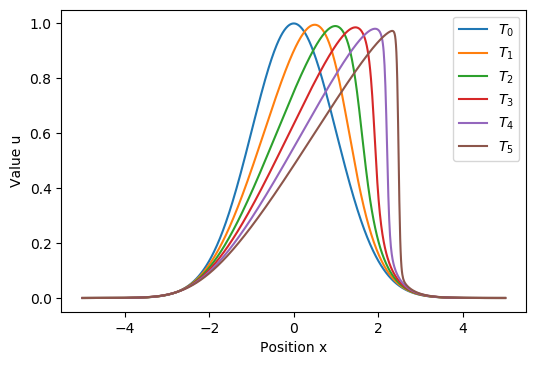

In [17]:
for i,s in enumerate(sol.T[::500]):
    plt.plot(np.linspace(-5,5,sol.shape[0]), s, label="$T_{}$".format(i))
plt.legend()
plt.xlabel("Position x")
plt.ylabel("Value u")

## c) Ommiting the viscous term ($D=0$)

In [18]:
diffusion = 0
sol = burgers(u_0, time_steps, diffusion)

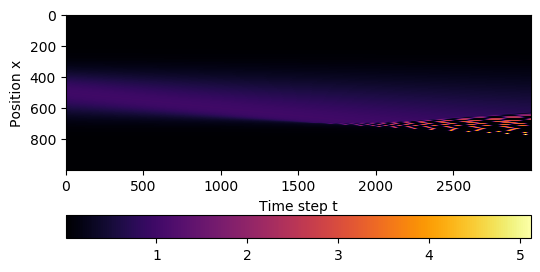

In [19]:
plt.imshow(sol, cmap="inferno")
plt.xlabel("Time step t")
plt.ylabel("Position x")
plt.colorbar(orientation="horizontal")

Text(0, 0.5, 'Value u')

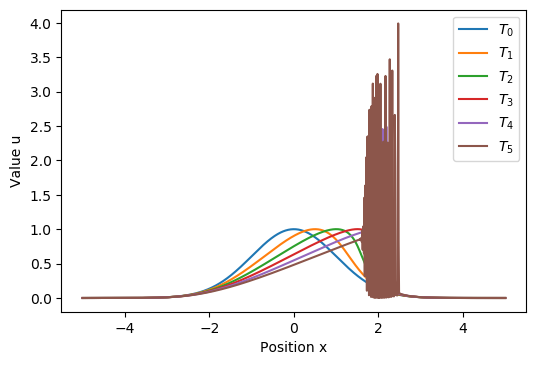

In [20]:
for i,s in enumerate(sol.T[::500]):
    plt.plot(np.linspace(-5,5,sol.shape[0]), s, label="$T_{}$".format(i))
plt.legend()
plt.xlabel("Position x")
plt.ylabel("Value u")

Without viscosity, Burger's equation develops discontinuities (shock waves)

## Extra:  Animation of time evolution for the invicid Burger's equation (AKA the wave breaker)

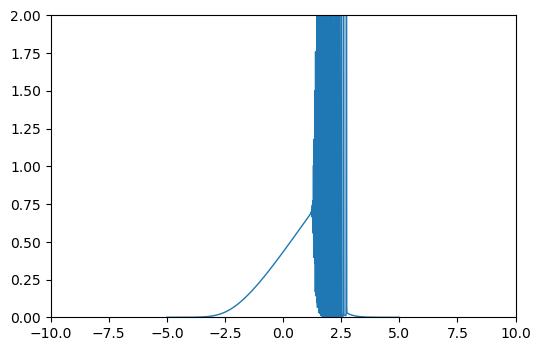

In [26]:
# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim=(-10, 10), ylim=(0, 2))
line, = ax.plot([], [], lw=1)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# animation function.  This is called sequentially
soln = sol.T[::10]
soln = soln.T

def animate(i):
    x = np.linspace(-5,5,soln.shape[0])
    y = soln[:,i]
    line.set_data(x, y)
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=soln.shape[1], interval=1, blit=True)

anim.save('animation.gif', writer="imagemagick", fps=60)

rc('animation', html='html5')
Image(url='animation.gif')